In [1]:
%matplotlib inline
from ui.graph import ModelPieChart
from model.projects import StandardProject
from IPython.core.display_functions import display

p = StandardProject()
g = ModelPieChart(p)
display(g.get_widget())

interactive(children=(IntSlider(value=2000, description='Dev man-days', layout=Layout(width='400'), max=3000, …

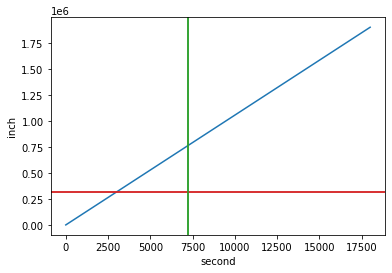

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pint

ureg = pint.UnitRegistry()
ureg.setup_matplotlib(True)

y = np.linspace(0, 30) * ureg.miles
x = np.linspace(0, 5) * ureg.hours

fig, ax = plt.subplots()
ax.yaxis.set_units(ureg.inches)
ax.xaxis.set_units(ureg.seconds)

ax.plot(x, y, "tab:blue")
ax.axhline(26400 * ureg.feet, color="tab:red")
ax.axvline(120 * ureg.minutes, color="tab:green")

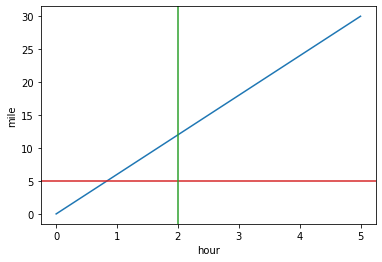

In [3]:
ureg = pint.UnitRegistry()
ureg.setup_matplotlib(True)

y = np.linspace(0, 30) * ureg.miles
x = np.linspace(0, 5) * ureg.hours

fig, ax = plt.subplots()
ax.plot(x, y, "tab:blue")
ax.axhline(26400 * ureg.feet, color="tab:red")
ax.axvline(120 * ureg.minutes, color="tab:green")